# 판다스(pandas) 심화

## 데이터프레임 정렬

In [2]:
import numpy as np
import pandas as pd
print("DataFrame : ")
data = {
    'col1' : [2, 1, 9, 8, 7, 4],
    'col2' : ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col3' : [0, 1, 9, 4, 2, 3]
}
index = [1, 3, 2, 5, 0, 4]
df = pd.DataFrame(data, index = index)
df

DataFrame : 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [8]:
# sort_index axis = 1(열) 을 축으로 정렬, 내림차순
df = df.sort_index(axis = 1, ascending = False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [9]:
# sort_value
sorted_df1 = df.sort_values('col1', ascending = True)
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [11]:
# sort_value 2
sorted_df2 = df.sort_values(['col2', 'col1'], ascending = [True, False])
sorted_df2

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


## 데이터 분석용 함수

In [29]:
import numpy as np
import pandas as pd
data = {
    'korean' : [50, 60, 70, 30],
    'math' : [30, np.nan, 40, 20]
}
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(data, index = index)
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')


,korean,math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [30]:
print(df.count(axis = 0)) # 기본값 생략가능

korean    4
math      3
dtype: int64


In [31]:
print(df.count(axis = 1))

a    2
b    1
c    2
d    2
dtype: int64


In [35]:
# max(), min(), sum(), mean()
print(df.max())
print(df.max(axis = 1))
print(df.min())
print(df.min(axis = 1))
print(df.sum())
print(df.sum(axis = 1))
print(df.mean())
print(df.mean(axis = 1))

korean    70.0
math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korean    30.0
math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
korean    52.5
math      30.0
dtype: float64
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64


In [34]:
# max(), min(), sum(), mean()
print(df.max())
print(df.max(axis = 1))
print(df.min())
print(df.min(axis = 1))
print(df.sum())
print(df.sum(axis = 1))
print(df.mean())
print(df.mean(axis = 1, skipna = False)) # NaN값 보이게 하기

korean    70.0
math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korean    30.0
math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
korean    52.5
math      30.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [36]:
# 결측값 대체 fillna
avg = df['math'].mean()
df['math'] = df['math'].fillna(avg)
df

,korean,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


In [12]:
x = np.random.randint(1, 5, size = (10, 5))
x

array([[4, 2, 3, 3, 3],
       [3, 2, 3, 4, 3],
       [4, 4, 3, 4, 2],
       [3, 3, 3, 2, 2],
       [3, 4, 4, 4, 2],
       [2, 1, 3, 2, 4],
       [2, 4, 1, 2, 4],
       [1, 2, 3, 1, 3],
       [4, 2, 1, 4, 4],
       [1, 3, 2, 1, 3]], dtype=int32)

In [15]:
x = np.random.rand(10, 5)
x

array([[0.06748138, 0.43417601, 0.14485948, 0.56011276, 0.89628839],
       [0.57976226, 0.27473613, 0.07112068, 0.83441166, 0.41430504],
       [0.4810098 , 0.06654008, 0.47162807, 0.261408  , 0.39800674],
       [0.98911786, 0.37007346, 0.77002286, 0.27963616, 0.42881703],
       [0.27212107, 0.45014632, 0.55769999, 0.70214893, 0.40445959],
       [0.62418339, 0.0476476 , 0.93218685, 0.70026041, 0.28794974],
       [0.26206222, 0.93824478, 0.11732106, 0.82951301, 0.52712582],
       [0.40733643, 0.60058717, 0.30972321, 0.40168456, 0.70317436],
       [0.38457631, 0.79559795, 0.76359511, 0.54810647, 0.97312414],
       [0.16060868, 0.83220723, 0.74825968, 0.06383234, 0.69640573]])

In [20]:
x = np.random.normal(5, 3, (10, 5)) # 평균이 5, 표준편차 3
print(x, np.mean(x), np.std(x), np.min(x), np.max(x))

[[10.183625    3.68339592  6.91187656  4.4911681   1.6406362 ]
 [ 8.82375661  7.41619146  6.22502963  5.38549034  7.04343346]
 [ 2.87776448  3.92049506  5.06281778 -0.18125557  2.35233896]
 [ 4.36464291  3.53862234  4.35977422  9.75366947  2.13630393]
 [ 3.3152702   7.26081466  8.87199728  8.10994293  6.34693792]
 [ 1.95087501  7.78861283 12.04738396  8.57744187  2.9496511 ]
 [11.08711231 10.68438363 10.18422613  1.60624897  4.9773574 ]
 [ 7.22860707 -0.28211414  5.11381931  4.05907059  6.16840519]
 [ 1.70014538  3.16443003  6.52907988  4.25840568  6.98523913]
 [ 5.57255308  3.12611631 11.35813936  1.94360069  4.52435029]] 5.543957618360171 3.048109100071064 -0.2821141355424519 12.04738395662024


In [21]:
x = np.random.randn(10, 5)
print(x, np.mean(x), np.std(x), np.min(x), np.max(x))

[[ 1.89877872  0.23119217  0.32245479 -1.34357469  0.89414094]
 [-0.02291872 -1.3410063   1.97552603  1.76196008  1.03550821]
 [-1.01298339  2.19141609 -0.17384359 -0.1061854  -0.15912637]
 [-1.66646328 -0.26339469  1.06062083  0.69560403 -0.29492036]
 [-0.55169834  0.68256181 -0.89463771  0.70669598 -1.45726806]
 [ 0.57920631  1.61449695 -0.70519507 -1.65517768  0.53052255]
 [ 0.6832937  -0.64452918 -1.16291353 -0.0375874  -0.49290716]
 [ 0.71559314  0.72477725  0.28972786 -1.19876357 -1.11806417]
 [ 1.14813033  2.08259529 -0.15175969  1.55259719 -0.47161334]
 [-0.33389489  0.7204666   0.5126377   1.00151649 -0.4073441 ]] 0.15888500718162465 1.0269993454711628 -1.6664632822375187 2.1914160914854683


In [22]:
x = np.array([3, 4, 45, 43, 65, 0, 0, 0, 24362, 6, 45, 6, 432, 562])
print('x의 개수', len(x))
print('x의 개수', np.count_nonzero(x))
print('0의 개수', len(x) - np.count_nonzero(x))

x의 개수 14
x의 개수 11
0의 개수 3


In [26]:
print(np.mean(x))
print(x.mean())
print(np.var(x))
print(x.var())
print(np.std(x))
print(x.std())
print(np.max(x))
print(x.max())
print(np.min(x))
print(x.min())

1826.642857142857
1826.642857142857
39093356.8010204
39093356.8010204
6252.468056777291
6252.468056777291
24362
24362
0
0


## 그룹으로 묶기(groupby)

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
        'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
        'data1' : [1, 2, 3, 1, 2, 3],
        'data2' : [4, 4, 6, 0, 6, 1],
        #'data3' : ['안녕', 'a', 'b', '하세요', 'pple', 'anana']
    })
print("DataFrame")
df

DataFrame


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [5]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [6]:
df.groupby(['key', 'data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [7]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [8]:
df.groupby('key').aggregate({'data1' : 'min', 'data2' : 'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [9]:
# filter 메소드
t = list(range(1, 11))
result = []
def is_even(x):
    return True if x % 2 == 0 else False

for i in t:
    if is_even(i):
        result.append(i)

print(result)

[2, 4, 6, 8, 10]


In [11]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [12]:
def filter_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [15]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [33]:
df1 = df.groupby('key').get_group('A')
df2 = df.groupby('key').get_group('B')
df3 = df.groupby('key').get_group('C')
pd.concat([df1, df2, df3])
df4 = pd.concat([df1, df2], axis = 1)
df5 = pd.concat([df1, df3], axis = 1)
df6 = pd.concat([df2, df3])
# means = df2['data2'].astype(int).mean()
# means
# df5.fillna(method = 'ffill')
df5.ffill() # 뒤쪽 NaN값 채움
# df5.bfill() # 앞쪽 NaN값 채움
# df5.fillna(0) # 0으로 결측값 채움

,key,data1,data2,key,data1,data2
0,A,1.0,4.0,NaN,NaN,NaN
3,A,1.0,0.0,NaN,NaN,NaN
2,A,1.0,0.0,C,3.0,6.0
5,A,1.0,0.0,C,3.0,1.0


## 피봇과 피봇테이블
- groupby - 세로형 데이터프레임 유지
- pivot, pivot_table - 가로형 재결합, 재가공의 느낌

In [37]:
import pandas as pd
df = pd.DataFrame([
    ['20210901', 'A',   1],
    ['20210901', 'B',  10],
    ['20210901', 'C', 100],
    ['20210902', 'A' ,   2],
    ['20210902', 'B',  20],
    ['20210902', 'C', 200],
    ['20210903', 'A',   3],
    ['20210903', 'B',  30],
    ['20210903', 'C', 300],
    
], columns = ['date','type', 'volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [39]:
pivot1 = df.pivot(index = 'date', columns = 'type', values = 'volume')
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [40]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [42]:
pivot1.reset_index(level = 0, inplace = True)
pivot1

,date,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [ ]:
pivot1

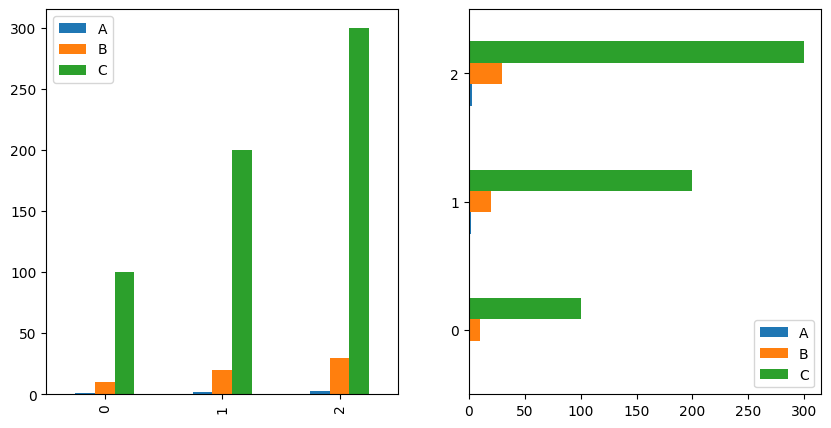

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
pivot1.plot(kind = 'bar', ax = ax[0])
pivot1.plot(kind = 'barh', ax = ax[1])
plt.show()

In [48]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    '지역' : ['안동', '안동', '안동', '경기',
           '경기', '부산', '서울', '안동'],
    '요일' : ['월', '월', '수', '월', '화',
           '월', '목', '금'],
    '강수확률' : [80, 70, 90, 10, 20, 30, 40, 80],
    '강수량' : [80, 50, 100, 200, 200, 100, 50, 1000]
})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [49]:
pd.pivot_table(df, index = '요일',
                   columns = '지역',
                   aggfunc = np.max)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\684539506.py:1: FutureWarning: The provided callable <function max at 0x000001DD6A527920> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index = '요일',


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금     NaN    NaN   NaN  1000.0   NaN   NaN   NaN  80.0
목     NaN    NaN  50.0     NaN   NaN   NaN  40.0   NaN
수     NaN    NaN   NaN   100.0   NaN   NaN   NaN  90.0
월   200.0  100.0   NaN    80.0  10.0  30.0   NaN  80.0
화   200.0    NaN   NaN     NaN  20.0   NaN   NaN   NaN

In [50]:
pd.pivot_table(df, index = '요일',
                   columns = '지역',
                   aggfunc = np.max).fillna('')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10640\560162197.py:1: FutureWarning: The provided callable <function max at 0x000001DD6A527920> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index = '요일',


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [51]:
data = {
    '도시' : ['서울', '부산', '서울', '부산', '대구', '대구', '대구'],
    '연도' : [2022, 2022, 2023, 2023, 2022, 2023, 2023],
    '판매량' : [100, 80, 120, 90, 70, 60, 0]
}
df = pd.DataFrame(data)
pivot = df.pivot_table(index = '도시', columns = '연도', values = '판매량', aggfunc = 'min', fill_value = 0)
pivot

연도,2022,2023
도시,,
대구,70,0
부산,80,90
서울,100,120


# 데이터 시각화(Matplotlib)

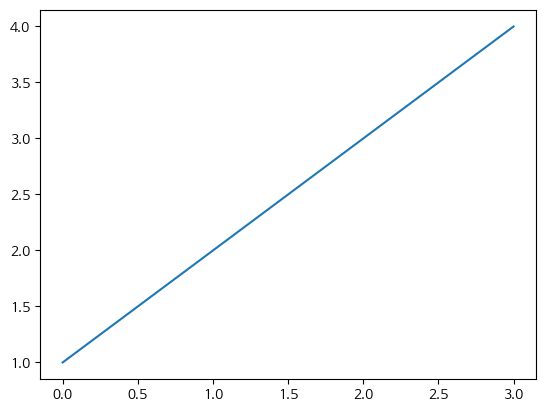

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

plt.plot([1, 2, 3, 4])
plt.show()

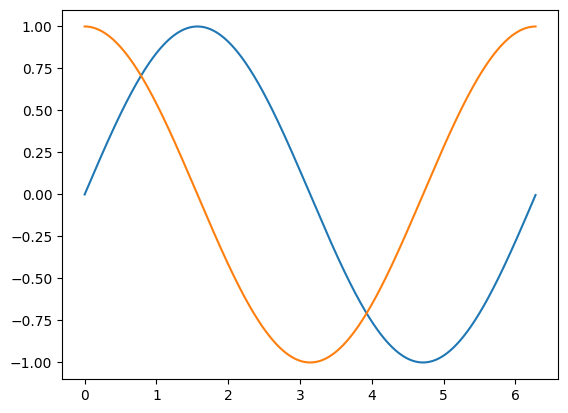

In [5]:
import numpy as np
x = np.arange(0, 2*np.pi, 0.01)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

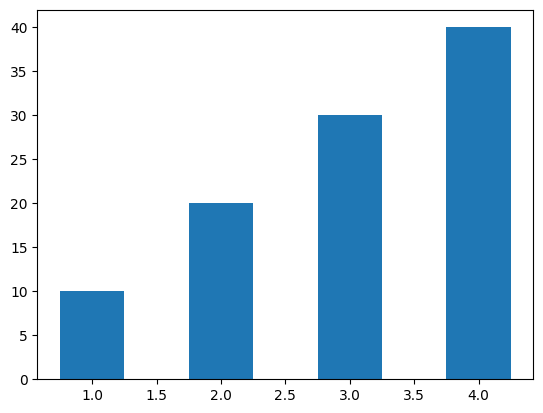

In [7]:
plt.bar([1, 2, 3, 4], [10, 20, 30, 40], width = 0.5)
plt.show()

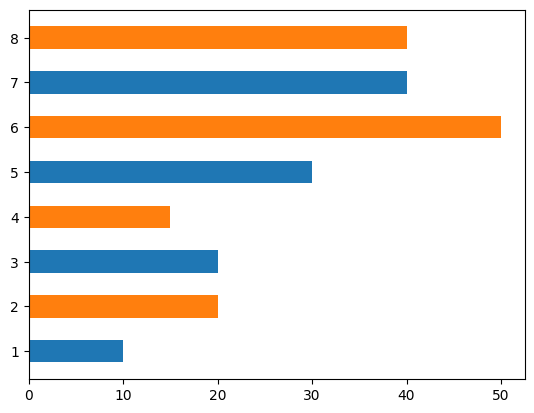

In [8]:
plt.barh(range(1, 8, 2), [10, 20, 30, 40], height = 0.5)
plt.barh(range(2, 9, 2), [20, 15, 50, 40], height = 0.5)
plt.show()

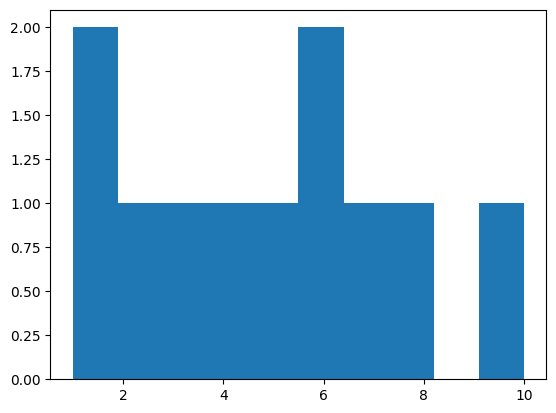

In [13]:
plt.hist([1, 1, 2, 3, 4, 5, 6, 6, 7, 8, 10])
plt.show()

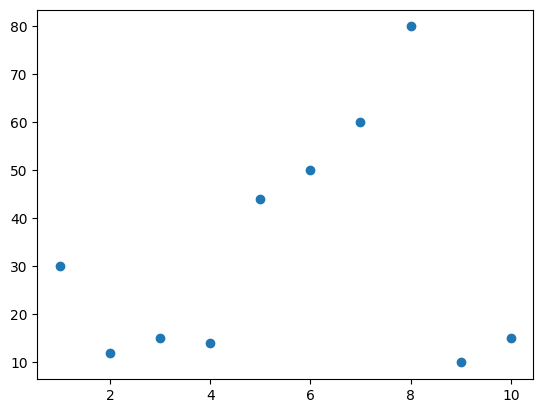

In [14]:
plt.scatter(range(1, 11), [30, 12, 15, 14, 44, 50, 60, 80, 10, 15])
plt.show()

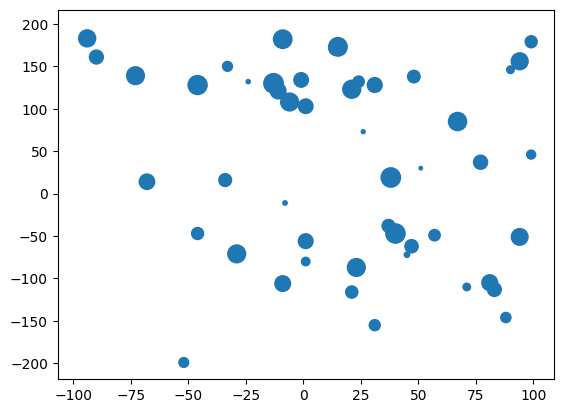

In [18]:
x = np.random.randint(-100, 100, 100)
y = np.random.randint(-200, 200, 100)
size = np.random.randint(-200, 200, 100)
plt.scatter(x, y, s = size)
plt.show()

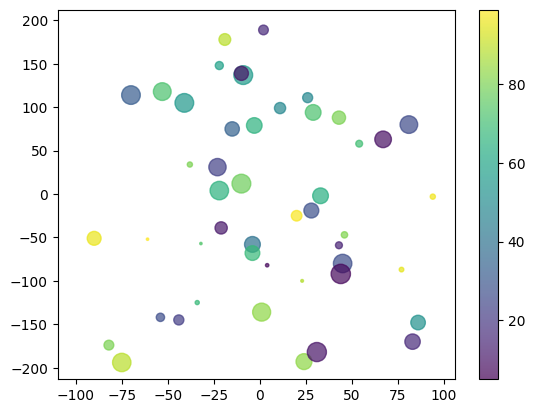

In [20]:
x = np.random.randint(-100, 100, 100)
y = np.random.randint(-200, 200, 100)
size = np.random.randint(-200, 200, 100)
color = np.random.randint(0, 100, 100)
plt.scatter(x, y, s = size, c = color, alpha = 0.7)
plt.colorbar()
plt.show()

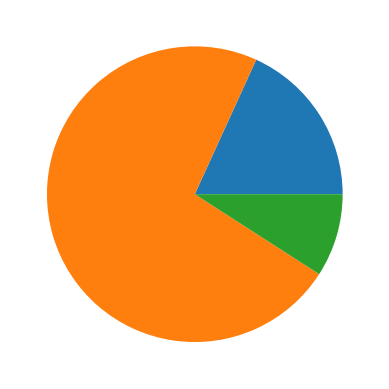

In [21]:
plt.pie([20, 80, 10])
plt.show()

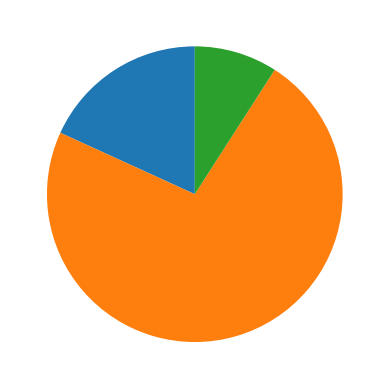

In [22]:
plt.pie([20, 80, 10], startangle = 90)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


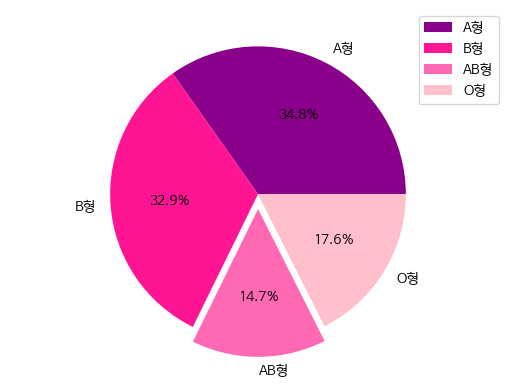

In [27]:
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%', explode = (0, 0, 0.1, 0), colors = color)
plt.legend()
plt.show()